In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df1 = pd.read_csv("student_survey_data1.csv")
df2 = pd.read_csv("student_survey_data2.csv")
df3 = pd.read_csv("student_survey_data3.csv")

In [3]:
data= pd.concat([df1, df2, df3], ignore_index=True)
data.to_csv("combined_file.csv", index=False)

In [4]:
data

,Faculty,Year,Energy Level (1-10),Sleep Hours,Classes,Meals,Tests,Date
0,economics and management,3,4,3,2,3,0,NaN
1,economics and management,3,5,8,4,2,0,NaN
2,economics and management,3,5,6,4,3,0,NaN
3,economics and management,3,9,12,4,2,0,NaN
4,economics and management,1,6,10,3,3,1,NaN
...,...,...,...,...,...,...,...,...
415,law and administration,2,7,10,2,3,2,2025-03-21
416,law and administration,2,3,7,2,2,2,2025-03-21
417,law and administration,1,6,8,3,5,0,2025-03-21
418,law and administration,3,9,10,1,4,0,2025-03-21


In [5]:
data=data.drop(['Date'], axis=1)

In [6]:
np.random.seed(42)


energy = data["Energy Level (1-10)"]


normalized_energy = (energy - energy.min()) / (energy.max() - energy.min())


p_nothing = 0.45 - 0.15 * normalized_energy       
p_coffee = 0.37 + 0.10 * normalized_energy        
p_energy_drink = 0.18 + 0.05 * normalized_energy   


total = p_nothing + p_coffee + p_energy_drink
p_nothing /= total
p_coffee /= total
p_energy_drink /= total


choices = []
for i in range(len(data)):
    choices.append(str(np.random.choice(
        ["coffee", "nothing", "energy drink"],
        p=[p_coffee[i], p_nothing[i], p_energy_drink[i]]
    )))


data["Stimulant"] = choices

In [7]:
data=data.join(pd.get_dummies(data['Stimulant'], dtype=int))

In [8]:
from sklearn.model_selection import train_test_split
x=data.drop(['Energy Level (1-10)', 'Stimulant'],  axis=1)
y=data['Energy Level (1-10)']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [10]:
train_data=x_train.join(y_train)

In [11]:
data

,Faculty,Year,Energy Level (1-10),Sleep Hours,Classes,Meals,Tests,Stimulant,coffee,energy drink,nothing
0,economics and management,3,4,3,2,3,0,coffee,1,0,0
1,economics and management,3,5,8,4,2,0,energy drink,0,1,0
2,economics and management,3,5,6,4,3,0,nothing,0,0,1
3,economics and management,3,9,12,4,2,0,nothing,0,0,1
4,economics and management,1,6,10,3,3,1,coffee,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
415,law and administration,2,7,10,2,3,2,nothing,0,0,1
416,law and administration,2,3,7,2,2,2,coffee,1,0,0
417,law and administration,1,6,8,3,5,0,coffee,1,0,0
418,law and administration,3,9,10,1,4,0,nothing,0,0,1


<Axes: >

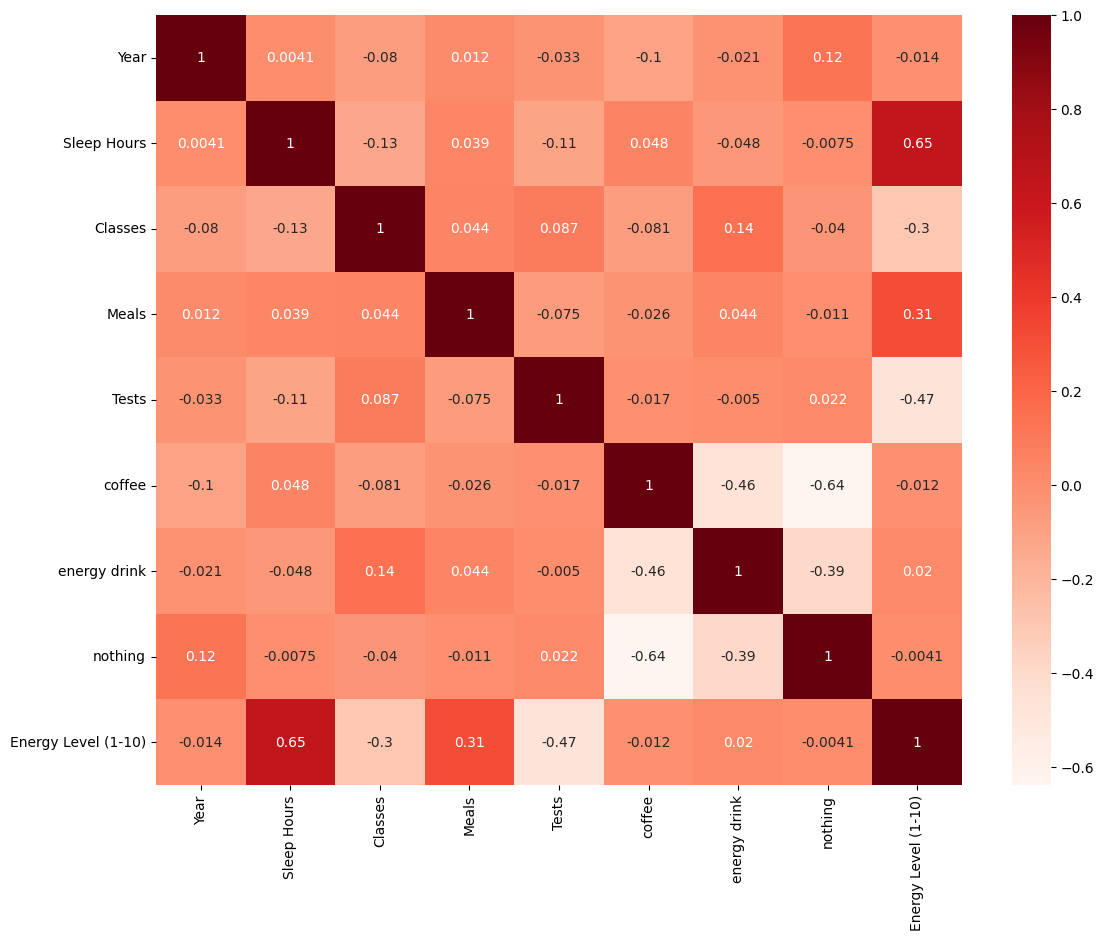

In [12]:
plt.figure(figsize=(13, 10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="Reds")

In [13]:
test_data=x_test.join(y_test)

test_data['Year']=np.log(test_data['Year']+1)
test_data['Sleep Hours']=np.log(test_data['Sleep Hours']+1)
test_data['Classes']=np.log(test_data['Classes']+1)
test_data['Meals']=np.log(test_data['Meals']+1)
test_data['Tests']=np.log(test_data['Tests']+1)


In [14]:
x_test, y_test = test_data.drop(['Energy Level (1-10)', 'Faculty'], axis=1), test_data['Energy Level (1-10)']

In [15]:
df1=data.copy()
df1['sleep_h/energy_level']=data['Sleep Hours']/data['Energy Level (1-10)']
df1.head(10)

,Faculty,Year,Energy Level (1-10),Sleep Hours,Classes,Meals,Tests,Stimulant,coffee,energy drink,nothing,sleep_h/energy_level
0,economics and management,3,4,3,2,3,0,coffee,1,0,0,0.750000
1,economics and management,3,5,8,4,2,0,energy drink,0,1,0,1.600000
2,economics and management,3,5,6,4,3,0,nothing,0,0,1,1.200000
3,economics and management,3,9,12,4,2,0,nothing,0,0,1,1.333333
4,economics and management,1,6,10,3,3,1,coffee,1,0,0,1.666667
5,economics and management,1,6,9,1,3,1,coffee,1,0,0,1.500000
6,economics and management,1,6,7,3,3,1,coffee,1,0,0,1.166667
7,economics and management,1,6,8,2,3,1,energy drink,0,1,0,1.333333
8,economics and management,2,6,9,2,3,0,nothing,0,0,1,1.500000
9,economics and management,2,8,10,3,3,0,nothing,0,0,1,1.250000


In [16]:
dummies_faculty=pd.get_dummies(df1.Faculty, dtype=int)
dummies_faculty.head(10)

,economics and management,law and administration,medicine
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


Text(0, 0.5, 'Tests')

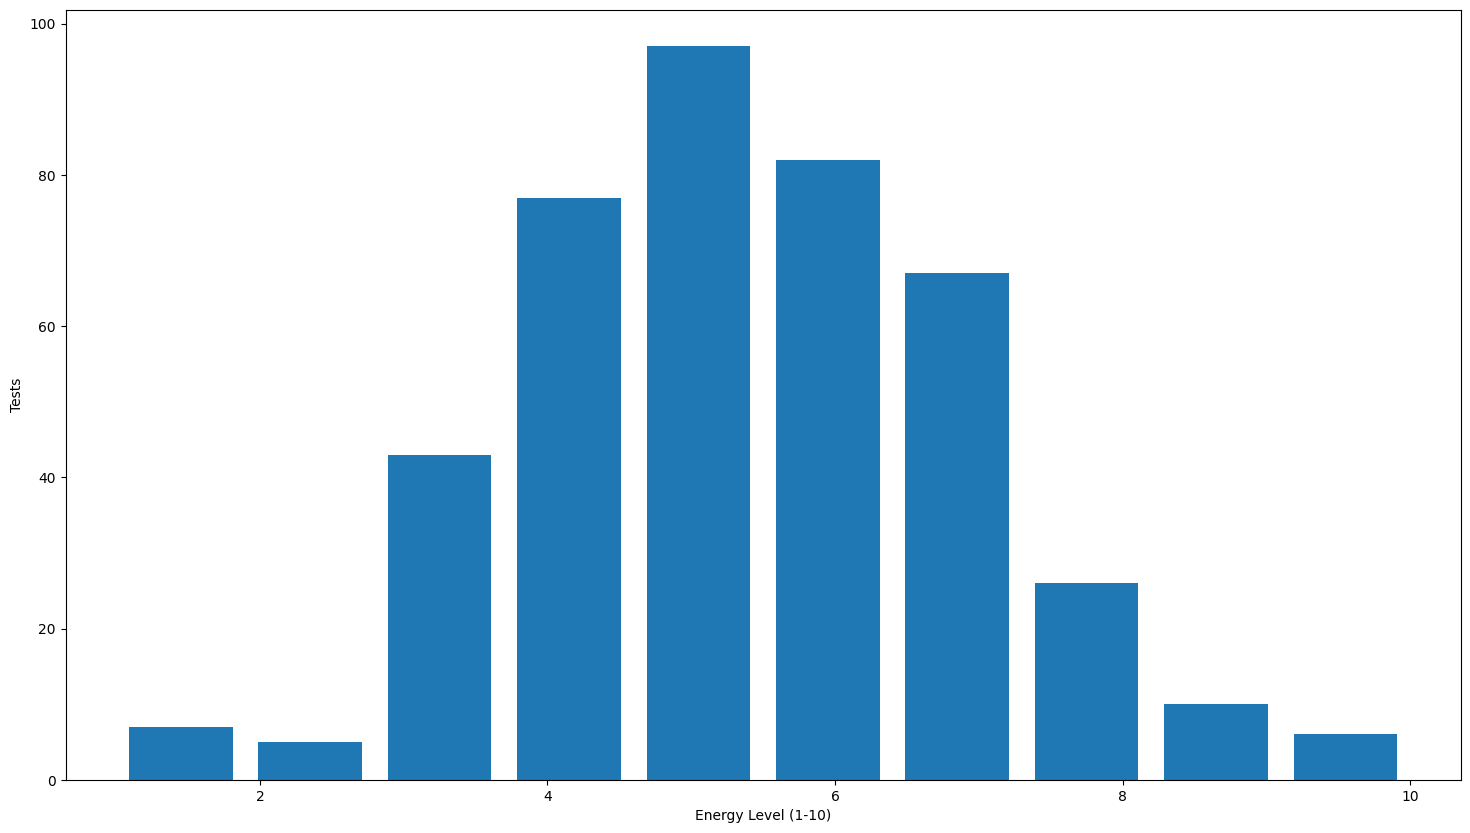

In [17]:

plt.rcParams["figure.figsize"] = (18,10)
plt.hist(df1["Energy Level (1-10)"],rwidth=0.8)
plt.xlabel("Energy Level (1-10)")
plt.ylabel("Tests")

In [18]:
full_df=df1.join(dummies_faculty).drop(['Faculty', 'sleep_h/energy_level'], axis=1)
full_df.head(3)

,Year,Energy Level (1-10),Sleep Hours,Classes,Meals,Tests,Stimulant,coffee,energy drink,nothing,economics and management,law and administration,medicine
0,3,4,3,2,3,0,coffee,1,0,0,1,0,0
1,3,5,8,4,2,0,energy drink,0,1,0,1,0,0
2,3,5,6,4,3,0,nothing,0,0,1,1,0,0


In [19]:
X = full_df.drop(['Energy Level (1-10)', 'Stimulant'],axis='columns')
X.head(3)

,Year,Sleep Hours,Classes,Meals,Tests,coffee,energy drink,nothing,economics and management,law and administration,medicine
0,3,3,2,3,0,1,0,0,1,0,0
1,3,8,4,2,0,0,1,0,1,0,0
2,3,6,4,3,0,0,0,1,1,0,0


In [20]:
y = full_df['Energy Level (1-10)']
y.head(3)

0    4
1    5
2    5
Name: Energy Level (1-10), dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [22]:

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [23]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [24]:
print(set(type(col) for col in X_train.columns))

{<class 'str'>}


In [25]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6608359613616227

In [26]:
print([type(col) for col in X_train.columns])

[<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]


In [27]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.74152307, 0.56535259, 0.71816539, 0.72593705, 0.67909429])

In [28]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]  
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(X,y)    

,model,best_score,best_params
0,linear_regression,0.686014,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.261201,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.503863,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [29]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Целевая переменная
y = full_df['Energy Level (1-10)']

# Признаки (все, кроме целевой переменной)
X = full_df.drop(columns=['Energy Level (1-10)', 'Stimulant'])  # 'Stimulant' уже представлен dummies

# Обучение модели
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [30]:
def predict_energy(year, sleep_hours, classes, meals, tests, stimulant, faculty):
    input_data = {
        'Year': year,
        'Sleep Hours': sleep_hours,
        'Classes': classes,
        'Meals': meals,
        'Tests': tests,
        'coffee': 0,
        'energy drink': 0,
        'nothing': 0,
        'economics and management': 0,
        'law and administration': 0,
        'medicine': 0
    }

    if stimulant in ['coffee', 'energy drink', 'nothing']:
        input_data[stimulant] = 1
    else:
        raise ValueError("Unavalid input")

    if faculty in ['economics and management', 'law and administration', 'medicine']:
        input_data[faculty] = 1
    else:
        raise ValueError("Unavalid input")

    input_df = pd.DataFrame([input_data])
    prediction = model.predict(input_df)[0]
    return prediction



In [31]:
pred = predict_energy(
    year=2,
    sleep_hours=6,
    classes=3,
    meals=2,
    tests=1,
    stimulant='coffee',
    faculty='medicine'
)

print(f"Predicted energy level: {pred:.2f}")

Predicted energy level: 2.97


In [32]:

from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display, clear_output


y = full_df['Energy Level (1-10)']
X = full_df.drop(columns=['Energy Level (1-10)', 'Stimulant'])

model = LinearRegression()
model.fit(X, y)

year_slider = widgets.IntSlider(min=1, max=3, step=1, description='Year of education:')
sleep_slider = widgets.IntSlider(min=0, max=12, step=1, description='Sleep (h):')
meals_slider = widgets.IntSlider(min=0, max=5, step=1, description='Meals:')
classes_slider = widgets.IntSlider(min=0, max=10, step=1, description='Classes:')
tests_slider = widgets.IntSlider(min=0, max=10, step=1, description='Tests:')

stimulant_dropdown = widgets.Dropdown(
    options=['coffee', 'energy drink', 'nothing'],
    description='Stimulant:'
)

faculty_dropdown = widgets.Dropdown(
    options=['economics and management', 'law and administration', 'medicine'],
    description='Faculty:'
)

output = widgets.Output()

def on_predict_clicked(b):
    with output:
        clear_output()
        input_data = {
            'Year': year_slider.value,
            'Sleep Hours': sleep_slider.value,
            'Classes': classes_slider.value,
            'Meals': meals_slider.value,
            'Tests': tests_slider.value,
            'coffee': 0,
            'energy drink': 0,
            'nothing': 0,
            'economics and management': 0,
            'law and administration': 0,
            'medicine': 0
        }

        input_data[stimulant_dropdown.value] = 1
        input_data[faculty_dropdown.value] = 1

        input_df = pd.DataFrame([input_data])
        prediction = model.predict(input_df)[0]
        print(f"Predicted energy level: {prediction:.2f}")

predict_button = widgets.Button(description="Predict")
predict_button.on_click(on_predict_clicked)

display(widgets.VBox([
    year_slider,
    sleep_slider,
    classes_slider,
    meals_slider,
    tests_slider,
    stimulant_dropdown,
    faculty_dropdown,
    predict_button,
    output
]))

In [33]:
import pickle
with open('student energy level','wb') as f:
    pickle.dump(lr_clf,f)

In [34]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle

X = full_df.drop(['Energy Level (1-10)','Stimulant'], axis=1)
y = full_df['Energy Level (1-10)']

model = LinearRegression()
model.fit(X, y)

with open('model.pkl', 'wb') as f:
    pickle.dump((model, X.columns.tolist()), f)

In [39]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    print(type(model))  # Должно быть: <class 'sklearn.linear_model._base.LinearRegression'>

<class 'tuple'>
